# 인천공항 이용자 수 분석 및 예측

- https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DA_2%26obj_var_id%3D%26seqNo%3D%26tblId%3DDT_1B28024%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D101%26
- 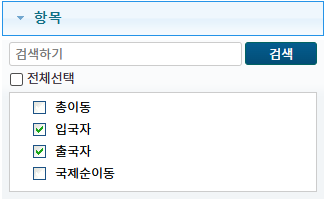
- 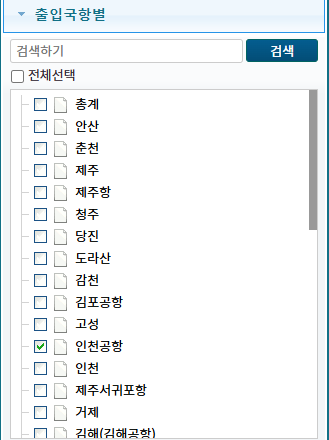
- 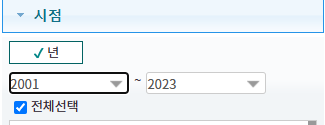

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file_path = './ref/출입국항구내외국인성별국제이동연간20250305.csv'
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [3]:
ex1_data = ori.copy()
ex1_data.columns = ['airport','type1','gender','year','type2','value']
# ex1_data.rename(columns={'출입국항별':'airport'})
# 모든 컬럼을 한꺼번에 변경해야 한다면 → ex1_data.columns = ['']
# 일부 컬럼만 바꾸고 싶다면 → ex1_data.rename(columns={'':''})
ex1_data

,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [ ]:
ex11_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex11_data

In [ ]:
# filter11 = ex1_data['type1']=='내국인'
# ex22_data = ex1_data[filter1].copy()
# # ex1_data[filter1]

filter1 = ex1_data['type1']=='외국인'
ex1_filtered = ex1_data[filter1]
filter2 = ex1_data['type1']=='내국인'
ex2_filtered = ex1_data[filter2]

In [ ]:
ex1_filtered

In [ ]:
ex2_filtered

In [ ]:
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name='total')
ex2_data.head()

In [ ]:
filter3 = ex2_filtered['type2']=='입국자'
ex3_filtered = ex2_filtered[filter3]
filter4 = ex2_filtered['type2']=='출국자'
ex4_filtered = ex2_filtered[filter4]
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex4_data = ex4_filtered.groupby('year')['value'].sum().reset_index(name="total")

In [ ]:
ex3_data

In [ ]:
ex4_data

In [ ]:
d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
matplotlib.rcParams['font.family']='D2Coding'

In [ ]:
ex3_data.plot(figsize=(10,5), title='2021~2023년 인천공항 입국 내국인 차트')

plt.show()

In [ ]:
ex4_data.plot(figsize=(10,5), title='2021~2023년 인천공항 출국 내국인 차트')

plt.show()

In [ ]:
#!pip install prophet
#!pip install --upgrade plotly
# !pip install tqdm
# !pip install --upgrade jupyter ipywidgets

In [ ]:
from prophet import Prophet
# from .autonotebook import tqdm as notebook_tqdm

In [ ]:
# 페이스북에서는 time(year)을 ds, value는 y를 사용하므로 전처리 해주어야 한다
ex5_data = ex2_data.copy()
ex5_data['year'] = pd.to_datetime(ex5_data['year'], format='%Y')
ex5_data = ex5_data.rename(columns={'year':'ds','total':'y'})
ex5_data.tail()

In [ ]:
m = Prophet()
m.fit(ex5_data)

In [ ]:
future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('./chart/Team예측.png')
plt.show

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# 이미지 불러오기
img = mpimg.imread("./chart/Team예측.png")

fig, axs = plt.subplots(2,3,figsize=(16,8))


axs[0,0].plot(ex3_data['year'],ex3_data['total'],color="y")
axs[0,1].plot(ex4_data['year'],ex4_data['total'],color="g") 
axs[0,2].plot(ex3_data['year'],ex3_data['total'],color="y") 
axs[0,2].plot(ex4_data['year'],ex4_data['total'],color="g") 
axs[1,0].plot(ex2_data['year'],ex2_data['total'],color="r") 
axs[1,2].plot(ex11_data['year'],ex11_data['total'],color="b") 
axs[1,2].plot(ex3_data['year'],ex3_data['total'],color="g") 
axs[1,2].plot(ex4_data['year'],ex4_data['total'],color="r")


axs[0,0].set_title("2021~2023년 인천공항 입국 내국인 차트")
axs[0,1].set_title("2021~2023년 인천공항 출국 내국인 차트")
axs[0,2].set_title("2021~2023년 인천공항 입출국 내국인 비교차트")
axs[1,0].set_title("2021~2023년 인천공항 내국인 이용객 차트")
axs[1,1].set_title("2021~2023년 인천공항 이용객 10년 이용자 예측")
axs[1,2].set_title("2021~2023년 인천공항 모든이용객과 내국인 출입 비교차트")

axins = fig.add_axes(axs[1,1])
axins.imshow(img)
plt.tight_layout()
plt.show()

인천공항 내국인 출입국 통계 분석 보고서

1. 개요

2001년부터 2023년까지 인천공항을 통한 내외국인의 출입국 데이터를 분석한 결과이다. 분석 대상은 내외국인의 연도별 입국자 및 출국자 수의 변화추세다.

2. 연도별 출입국 현황 -2012년을 기점으로 급증 후 점진적인 감소세 보임

3. 주요 변화 분석

1) 2012년 급증 원인

한국 관광 산업 및 한류의 영향으로 외국인 관광객 증가

글로벌 이벤트(예: 올림픽, 국제 회의 등)의 영향 가능성

2) 2015~2019년 안정화

연간 출입국자 수가 일정 수준 유지

안정적인 경제 상황과 항공 노선 확대로 해외여행 증가

3) 2020년 이후 감소

코로나19 팬데믹 영향으로 전 세계 여행 제한 조치 시행

4) 2021~2023년에는 점진적인 회복세

4. 결론 및 전망

2012년 출입국자의 급증은 글로벌 관광 트렌드 변화와 한류 영향이 반영된 것으로 판단됨

코로나19 이후 감소세를 보임

향후 경제 회복과 항공 노선 확대 여부에 따라 출입국 인원이 증가할 가능성이 있음

본 보고서는 인천공항 출입국 데이터를 통해 한국의 여행 및 관광 산업 동향을 분석하는 데 기초 자료로 활용될 수 있음.

